In [1]:
import pandas as pd
import os

simulation_name = "04_fold_dimer_X"
output_path = f"/home/broerman/crispy_shifty/projects/crispy_shifty_dimers/round_2/mpnn_upweight_int/{simulation_name}"
filtered_df = pd.read_csv(os.path.join(output_path, "scores_filtered.csv"), index_col=0)
filtered_df

,X_mean_pae,X_mean_pae_interaction,X_mean_pae_intra_chain,X_mean_pae_intra_chain_A,X_mean_plddt,X_model,X_pTMscore,X_protomer,X_recycles,X_rmsd_to_input,...,type,yhh_planarity,designed_by.1,mpnn_msd_design_area,mpnn_msd_temperature,parent,combo,mpnn_seq_id,unique_combo,num_Y_models
/pscratch/sd/b/broerman/04_fold_dimer_X/decoys/0010/04_fold_dimer_X_19bafbaf80ea494fab1340a0ccc47d37.pdb.bz2,4.680041,NaN,4.590363,4.590363,92.690384,3,0.808294,B,3.0,1.427970,...,monomer_ptm,5.361473e-08,mpnn,interface,0.2,CSD26,2422,mpnn_seq_0007,CSD26_2422_interface_mpnn_seq_0007,1.0
/pscratch/sd/b/broerman/04_fold_dimer_X/decoys/0010/04_fold_dimer_X_1b48c3206420472cad136185ac507eae.pdb.bz2,3.270248,NaN,3.149255,3.149255,95.676659,3,0.895631,A,3.0,1.397851,...,monomer_ptm,0.000000e+00,mpnn,neighborhood,0.2,CSD25,5511,mpnn_seq_0004,CSD25_5511_neighborhood_mpnn_seq_0004,1.0
/pscratch/sd/b/broerman/04_fold_dimer_X/decoys/0010/04_fold_dimer_X_0d33771e2a6249b8a4ed8f170677689b.pdb.bz2,4.518848,NaN,4.417732,4.417732,91.873940,4,0.838658,A,3.0,0.629146,...,monomer_ptm,0.000000e+00,mpnn,interface,0.2,CSD26,3532,mpnn_seq_0002,CSD26_3532_interface_mpnn_seq_0002,2.0
/pscratch/sd/b/broerman/04_fold_dimer_X/decoys/0010/04_fold_dimer_X_806e5be03f914ce3ae2c4de435700b7c.pdb.bz2,3.173715,NaN,3.064435,3.064435,96.037125,3,0.890436,B,3.0,0.585163,...,monomer_ptm,0.000000e+00,mpnn,neighborhood,0.2,CSD26,4231,mpnn_seq_0006,CSD26_4231_neighborhood_mpnn_seq_0006,1.0
/pscratch/sd/b/broerman/04_fold_dimer_X/decoys/0010/04_fold_dimer_X_31dd58d1a5184d2a8ba6a471bcb43745.pdb.bz2,2.767358,NaN,2.730190,2.730190,96.795326,5,0.894169,A,3.0,1.374462,...,monomer_ptm,2.582536e-07,mpnn,full,0.2,CSD26,2322,mpnn_seq_0002,CSD26_2322_full_mpnn_seq_0002,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
/pscratch/sd/b/broerman/04_fold_dimer_X/decoys/0012/04_fold_dimer_X_0c49e6c2b6834491b2130a18f4a21f72.pdb.bz2,2.677669,NaN,2.603124,2.603124,97.323463,1,0.900963,B,3.0,0.789017,...,monomer_ptm,1.290740e-07,mpnn,full,0.2,CSD26,5411,mpnn_seq_0002,CSD26_5411_full_mpnn_seq_0002,1.0
/pscratch/sd/b/broerman/04_fold_dimer_X/decoys/0012/04_fold_dimer_X_70beb4a1595244dfafaa4c97b654fa5b.pdb.bz2,3.359416,NaN,3.260782,3.260782,95.573639,1,0.868120,A,3.0,1.486341,...,monomer_ptm,0.000000e+00,mpnn,neighborhood,0.2,CSD26,1432,mpnn_seq_0005,CSD26_1432_neighborhood_mpnn_seq_0005,1.0
/pscratch/sd/b/broerman/04_fold_dimer_X/decoys/0012/04_fold_dimer_X_a14bf908dc0845fabafa4b32f1955310.pdb.bz2,3.289970,NaN,3.192464,3.192464,95.414963,1,0.875800,B,3.0,0.822566,...,monomer_ptm,0.000000e+00,mpnn,neighborhood,0.2,CSD26,3331,mpnn_seq_0008,CSD26_3331_neighborhood_mpnn_seq_0008,1.0
/pscratch/sd/b/broerman/04_fold_dimer_X/decoys/0012/04_fold_dimer_X_6fedc019768f4338864dc2674fbfdb15.pdb.bz2,3.859491,NaN,3.767377,3.767377,93.731758,2,0.853408,B,3.0,0.524862,...,monomer_ptm,0.000000e+00,mpnn,interface,0.2,CSD26,2421,mpnn_seq_0003,CSD26_2421_interface_mpnn_seq_0003,2.0


In [2]:
import sys
sys.path.insert(0, "/home/broerman/crispy_shifty")

<Figure size 2592x2592 with 0 Axes>

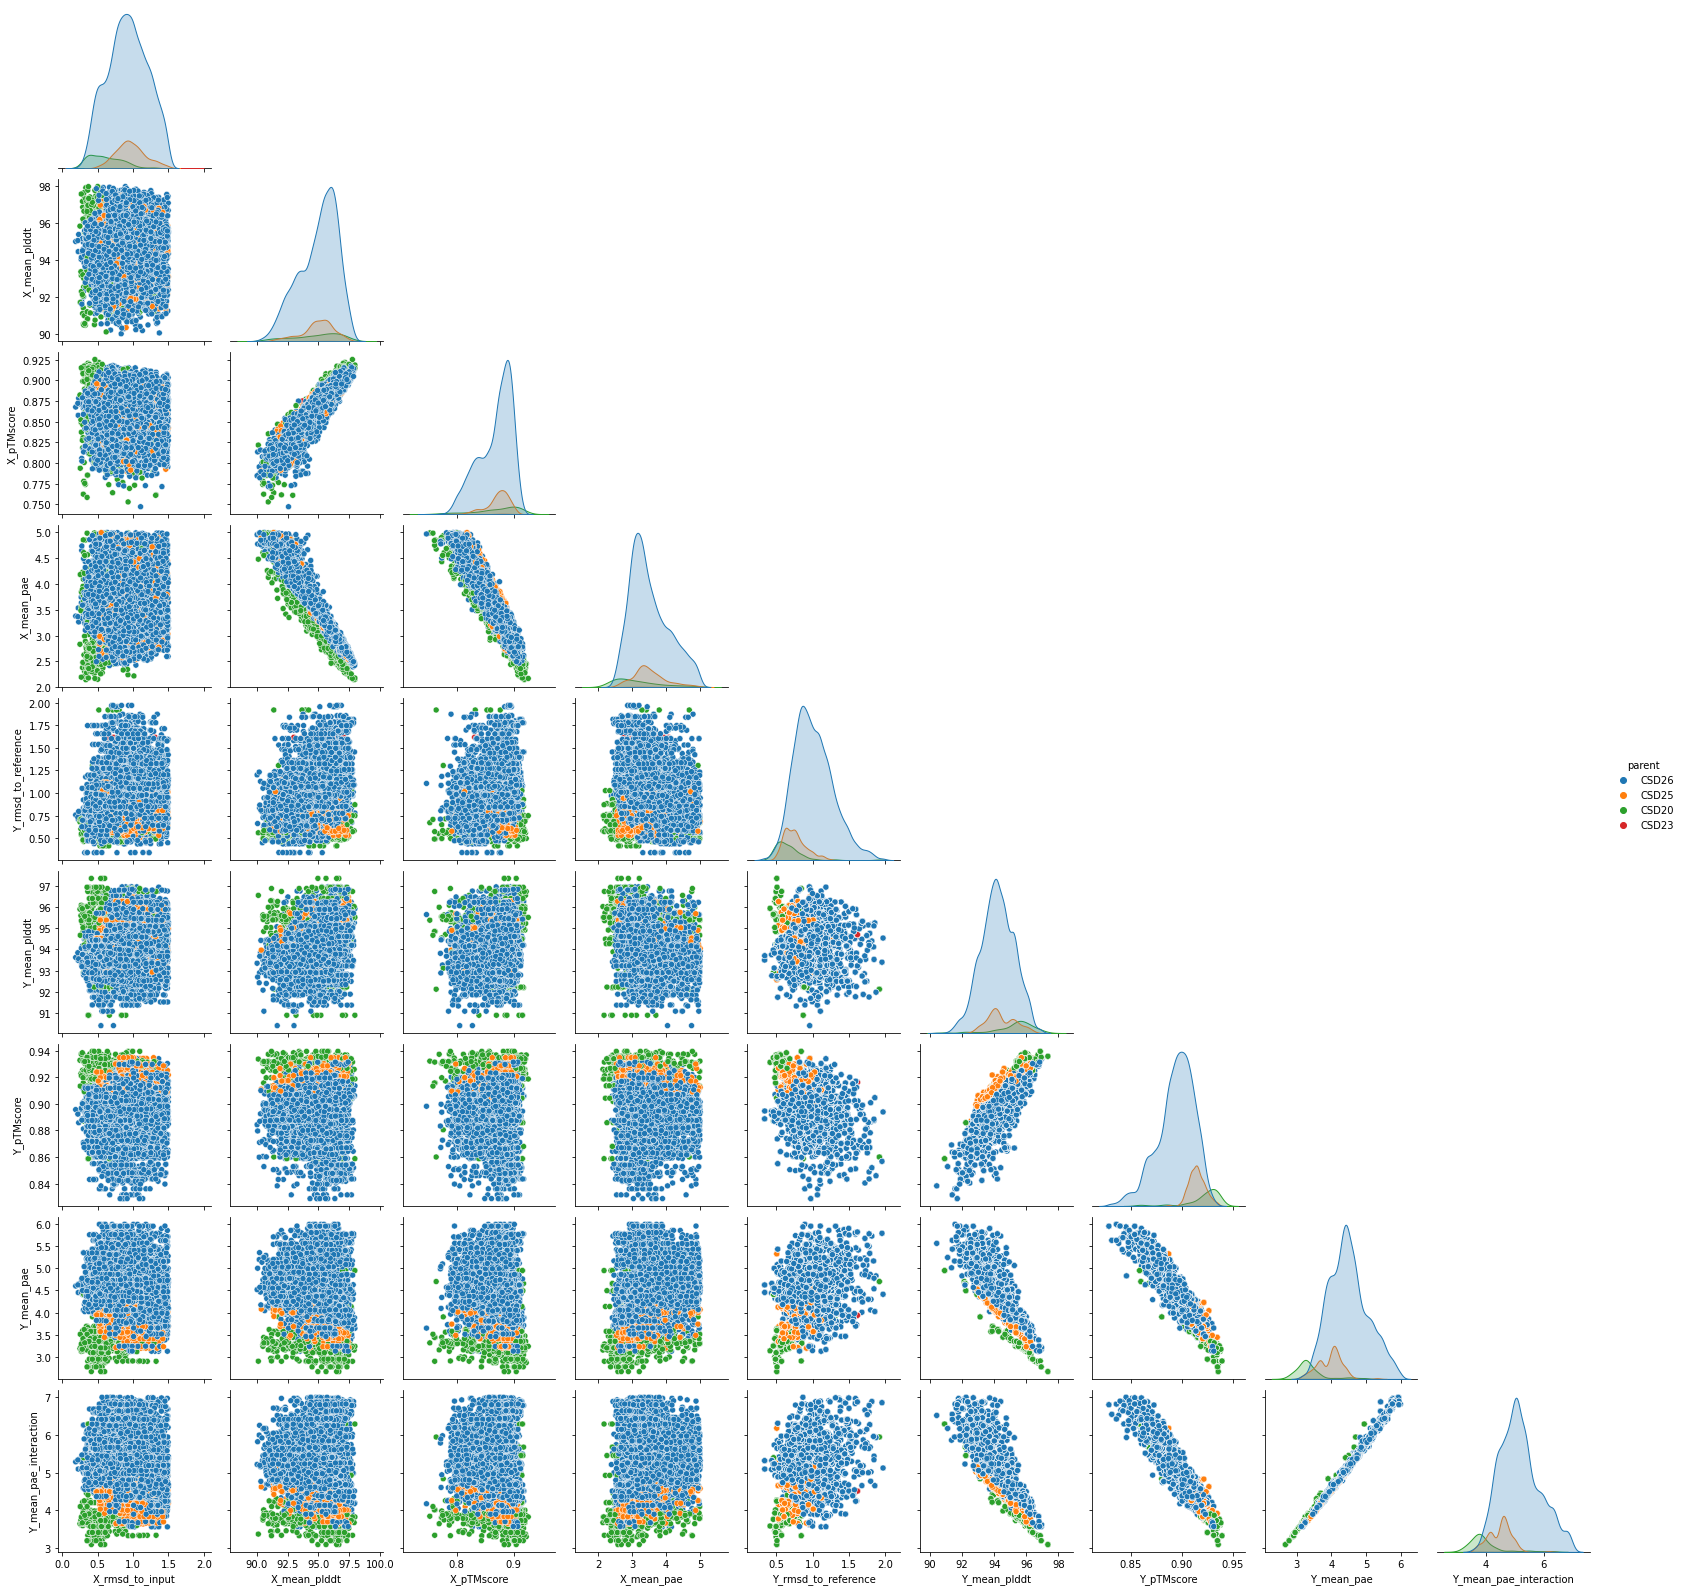

In [3]:
cols = [
    "X_rmsd_to_input",
    "X_mean_plddt",
    "X_pTMscore",
    "X_mean_pae",
    "Y_rmsd_to_reference",
    "Y_mean_plddt",
    "Y_pTMscore",
    "Y_mean_pae",
    "Y_mean_pae_interaction",
]

from crispy_shifty.utils.plotting import histplot_df, pairplot_df

the_fig = pairplot_df(
    df=filtered_df,
    cols=cols,
    hue="parent"
)

In [4]:
# filter based on whether both X protomers passed the filters for a given design

unique_combos = set()
for index, row in filtered_df.iterrows():
    unique_combos.add(row['unique_combo'])

combos_to_keep = set()
for unique_combo in unique_combos:
    if filtered_df[filtered_df['unique_combo'] == unique_combo]['X_protomer'].nunique() == 2:
        combos_to_keep.add(unique_combo)

complete_df = pd.DataFrame(columns=filtered_df.columns)
for combo in combos_to_keep:
    combo_A_df = filtered_df.query(f"unique_combo == '{combo}' and X_protomer == 'A'")
    combo_B_df = filtered_df.query(f"unique_combo == '{combo}' and X_protomer == 'B'")
    best_index_A = combo_A_df['X_mean_plddt'].idxmax()
    complete_df.loc[best_index_A] = combo_A_df.loc[best_index_A]
    complete_df.loc[best_index_A, "num_XA_models"] = len(combo_A_df)
    complete_df.loc[best_index_A, "num_XB_models"] = len(combo_B_df)
    best_index_B = combo_B_df['X_mean_plddt'].idxmax()
    complete_df.loc[best_index_B] = combo_B_df.loc[best_index_B]
    complete_df.loc[best_index_B, "num_XA_models"] = len(combo_A_df)
    complete_df.loc[best_index_B, "num_XB_models"] = len(combo_B_df)

from IPython.display import display
with pd.option_context(
    'display.max_columns', None,
    # 'display.max_rows', None,
):
    display(complete_df)

,X_mean_pae,X_mean_pae_interaction,X_mean_pae_intra_chain,X_mean_pae_intra_chain_A,X_mean_plddt,X_model,X_pTMscore,X_protomer,X_recycles,X_rmsd_to_input,X_seed,X_tol,X_type,Y_mean_pae,Y_mean_pae_interaction,Y_mean_pae_interaction_AB,Y_mean_pae_interaction_BA,Y_mean_pae_intra_chain,Y_mean_pae_intra_chain_A,Y_mean_pae_intra_chain_B,Y_mean_plddt,Y_model,Y_pTMscore,Y_recycles,Y_rmsd_to_reference,Y_seed,Y_tol,Y_type,designed_by,dslf_fa13,elapsed_time,fa_atr,fa_dun,fa_elec,fa_intra_rep,fa_intra_sol_xover4,fa_rep,fa_sol,hbond_bb_sc,hbond_lr_bb,hbond_sc,hbond_sr_bb,lk_ball_wtd,mean_pae,mean_pae_interaction,mean_pae_intra_chain,mean_pae_intra_chain_A,mean_plddt,model,omega,pTMscore,p_aa_pp,pro_close,rama_prepro,recycles,ref,rmsd_to_input,seed,tol,total_score,type,yhh_planarity,designed_by.1,mpnn_msd_design_area,mpnn_msd_temperature,parent,combo,mpnn_seq_id,unique_combo,num_Y_models,num_XA_models,num_XB_models
/pscratch/sd/b/broerman/04_fold_dimer_X/decoys/0001/04_fold_dimer_X_0c75f7f71103463fa384b49d45e714a6.pdb.bz2,4.546666,NaN,4.452559,4.452559,91.363785,5,0.814792,A,3.0,1.198112,0,0.104269,monomer_ptm,4.615445,5.329037,5.542425,5.115648,3.802104,4.580875,3.023334,94.040260,1,0.889724,3.0,0.867666,0,0.199830,monomer_ptm,mpnn,0.0,4.899554,-4931.257514,1634.120165,-1681.506724,1451.687072,180.331433,12000.645190,3625.555865,-21.421804,-29.014234,-47.874292,-686.226400,-80.018179,4.546666,NaN,4.452559,4.452559,91.363785,5,146.900005,0.814792,-237.631845,3.211040,-319.361227,3.0,-96.27976,1.198112,0,0.104269,3760.267940,monomer_ptm,1.322100e-08,mpnn,interface,0.2,CSD26,3122,mpnn_seq_0006,CSD26_3122_interface_mpnn_seq_0006,3.0,1.0,3.0
/pscratch/sd/b/broerman/04_fold_dimer_X/decoys/0001/04_fold_dimer_X_fda9a7ccea104f8d87097d71b8ee60fa.pdb.bz2,4.304449,NaN,4.217004,4.217004,92.889938,1,0.817960,B,3.0,1.146920,0,0.249051,monomer_ptm,4.615445,5.329037,5.542425,5.115648,3.802104,4.580875,3.023334,94.040260,1,0.889724,3.0,0.867666,0,0.199830,monomer_ptm,mpnn,0.0,75.751144,-4931.257514,1634.120165,-1681.506724,1451.687072,180.331433,12000.645190,3625.555865,-21.421804,-29.014234,-47.874292,-686.226400,-80.018179,4.304449,NaN,4.217004,4.217004,92.889938,1,146.900005,0.817960,-237.631845,3.211040,-319.361227,3.0,-96.27976,1.146920,0,0.249051,3760.267940,monomer_ptm,1.322100e-08,mpnn,interface,0.2,CSD26,3122,mpnn_seq_0006,CSD26_3122_interface_mpnn_seq_0006,3.0,1.0,3.0
/pscratch/sd/b/broerman/04_fold_dimer_X/decoys/0013/04_fold_dimer_X_46cb20b0ca6c4202bd7f49a336f8382f.pdb.bz2,3.346201,NaN,3.245424,3.245424,95.111427,5,0.879040,A,3.0,1.428251,0,0.094462,monomer_ptm,3.830698,4.312595,4.570523,4.054667,3.244679,3.685896,2.803463,95.460220,3,0.924324,3.0,0.998536,0,0.163205,monomer_ptm,mpnn,0.0,5.290794,-4919.371791,1617.612743,-1699.591158,1486.721633,186.506890,8267.341849,3674.503840,-28.604836,-29.139338,-57.147481,-679.234448,-88.684751,3.346201,NaN,3.245424,3.245424,95.111427,5,136.657595,0.879040,-259.254738,1.872270,-406.762410,3.0,-69.48006,1.428251,0,0.094462,1694.964861,monomer_ptm,0.000000e+00,mpnn,neighborhood,0.2,CSD26,2331,mpnn_seq_0005,CSD26_2331_neighborhood_mpnn_seq_0005,3.0,3.0,5.0
/pscratch/sd/b/broerman/04_fold_dimer_X/decoys/0013/04_fold_dimer_X_8b05d6a4463d467698e25b9fa465a5ec.pdb.bz2,3.095401,NaN,2.992307,2.992307,95.962715,5,0.886361,B,3.0,1.106985,0,0.104144,monomer_ptm,3.830698,4.312595,4.570523,4.054667,3.244679,3.685896,2.803463,95.460220,3,0.924324,3.0,0.998536,0,0.163205,monomer_ptm,mpnn,0.0,4.950426,-4919.371791,1617.612743,-1699.591158,1486.721633,186.506890,8267.341849,3674.503840,-28.604836,-29.139338,-57.147481,-679.234448,-88.684751,3.095401,NaN,2.992307,2.992307,95.962715,5,136.657595,0.886361,-259.254738,1.872270,-406.762410,3.0,-69.48006,1.106985,0,0.104144,1694.964861,monomer_ptm,0.000000e+00,mpnn,neighborhood,0.2,CSD26,2331,mpnn_seq_0005,CSD26_2331_neighborhood_mpnn_seq_0005,3.0,3.0,5.0
/pscratch/sd/b/broerman/04_fold_dimer_X/decoys/0010/04_fold_dimer_X_0e0d626925684f2fbc6b250001d925dc.pdb.bz2,3.059479,NaN,2.956

In [5]:
# measure sap of the state X designs

from tqdm.auto import tqdm
import pyrosetta
pyrosetta.distributed.maybe_init(**{
    "options": "-corrections::beta_nov16 true",
    "extra_options":{
        "-out:level": "100"
}})

from crispy_shifty.protocols.design import score_SAP

In [6]:
import bz2

for index in tqdm(complete_df.index):

    folded_fname = index.replace("/pscratch/sd/b/broerman", "/home/broerman/crispy_shifty/projects/crispy_shifty_dimers/round_2/mpnn_upweight_int")

    with open(folded_fname, 'rb') as bz2_file:
        pose = pyrosetta.rosetta.core.pose.Pose()
        pyrosetta.rosetta.core.import_pose.pose_from_pdbstring(pose, bz2.decompress(bz2_file.read()).decode())
        
    complete_df.at[index, 'X_sap'] = score_SAP(pose)

100%|██████████| 1328/1328 [28:19<00:00,  1.28s/it]


In [7]:
complete_df.to_csv(os.path.join(output_path, "scores_filtered_sap.csv"))

In [8]:
import pandas as pd
import os

simulation_name = "04_fold_dimer_X"
output_path = f"/home/broerman/crispy_shifty/projects/crispy_shifty_dimers/round_2/mpnn_upweight_int/{simulation_name}"
complete_df = pd.read_csv(os.path.join(output_path, "scores_filtered_sap.csv"), index_col=0)

In [9]:
complete_df

,X_mean_pae,X_mean_pae_interaction,X_mean_pae_intra_chain,X_mean_pae_intra_chain_A,X_mean_plddt,X_model,X_pTMscore,X_protomer,X_recycles,X_rmsd_to_input,...,mpnn_msd_design_area,mpnn_msd_temperature,parent,combo,mpnn_seq_id,unique_combo,num_Y_models,num_XA_models,num_XB_models,X_sap
/pscratch/sd/b/broerman/04_fold_dimer_X/decoys/0001/04_fold_dimer_X_0c75f7f71103463fa384b49d45e714a6.pdb.bz2,4.546666,NaN,4.452559,4.452559,91.363785,5,0.814792,A,3.0,1.198112,...,interface,0.2,CSD26,3122,mpnn_seq_0006,CSD26_3122_interface_mpnn_seq_0006,3.0,1.0,3.0,26.479008
/pscratch/sd/b/broerman/04_fold_dimer_X/decoys/0001/04_fold_dimer_X_fda9a7ccea104f8d87097d71b8ee60fa.pdb.bz2,4.304449,NaN,4.217004,4.217004,92.889938,1,0.817960,B,3.0,1.146920,...,interface,0.2,CSD26,3122,mpnn_seq_0006,CSD26_3122_interface_mpnn_seq_0006,3.0,1.0,3.0,34.031456
/pscratch/sd/b/broerman/04_fold_dimer_X/decoys/0013/04_fold_dimer_X_46cb20b0ca6c4202bd7f49a336f8382f.pdb.bz2,3.346201,NaN,3.245424,3.245424,95.111427,5,0.879040,A,3.0,1.428251,...,neighborhood,0.2,CSD26,2331,mpnn_seq_0005,CSD26_2331_neighborhood_mpnn_seq_0005,3.0,3.0,5.0,25.943060
/pscratch/sd/b/broerman/04_fold_dimer_X/decoys/0013/04_fold_dimer_X_8b05d6a4463d467698e25b9fa465a5ec.pdb.bz2,3.095401,NaN,2.992307,2.992307,95.962715,5,0.886361,B,3.0,1.106985,...,neighborhood,0.2,CSD26,2331,mpnn_seq_0005,CSD26_2331_neighborhood_mpnn_seq_0005,3.0,3.0,5.0,29.122869
/pscratch/sd/b/broerman/04_fold_dimer_X/decoys/0010/04_fold_dimer_X_0e0d626925684f2fbc6b250001d925dc.pdb.bz2,3.059479,NaN,2.956392,2.956392,96.410965,5,0.892698,A,3.0,1.110317,...,neighborhood,0.2,CSD26,4231,mpnn_seq_0007,CSD26_4231_neighborhood_mpnn_seq_0007,1.0,4.0,5.0,22.348381
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
/pscratch/sd/b/broerman/04_fold_dimer_X/decoys/0007/04_fold_dimer_X_281138c299594cf7bf553c53c4655efe.pdb.bz2,3.115939,NaN,3.056775,3.056775,95.665596,5,0.867719,B,3.0,0.960828,...,full,0.2,CSD26,3321,mpnn_seq_0006,CSD26_3321_full_mpnn_seq_0006,1.0,3.0,4.0,37.985752
/pscratch/sd/b/broerman/04_fold_dimer_X/decoys/0014/04_fold_dimer_X_3c82aa7f93fb4d318a7e48a049f75164.pdb.bz2,3.193135,NaN,3.140834,3.140834,95.992798,5,0.882732,A,3.0,1.352537,...,full,0.2,CSD26,3532,mpnn_seq_0004,CSD26_3532_full_mpnn_seq_0004,1.0,1.0,4.0,31.203510
/pscratch/sd/b/broerman/04_fold_dimer_X/decoys/0014/04_fold_dimer_X_fbc826a3579f40ba90752baaba6e5885.pdb.bz2,3.006036,NaN,2.965416,2.965416,96.186661,5,0.883170,B,3.0,0.917569,...,full,0.2,CSD26,3532,mpnn_seq_0004,CSD26_3532_full_mpnn_seq_0004,1.0,1.0,4.0,38.158401
/pscratch/sd/b/broerman/04_fold_dimer_X/decoys/0010/04_fold_dimer_X_1ebc533608014169a77c6e1bc722f517.pdb.bz2,3.666668,NaN,3.569561,3.569561,94.060318,5,0.860129,A,3.0,0.885340,...,interface,0.2,CSD26,2331,mpnn_seq_0004,CSD26_2331_interface_mpnn_seq_0004,1.0,3.0,5.0,17.866556


<Figure size 2880x2880 with 0 Axes>

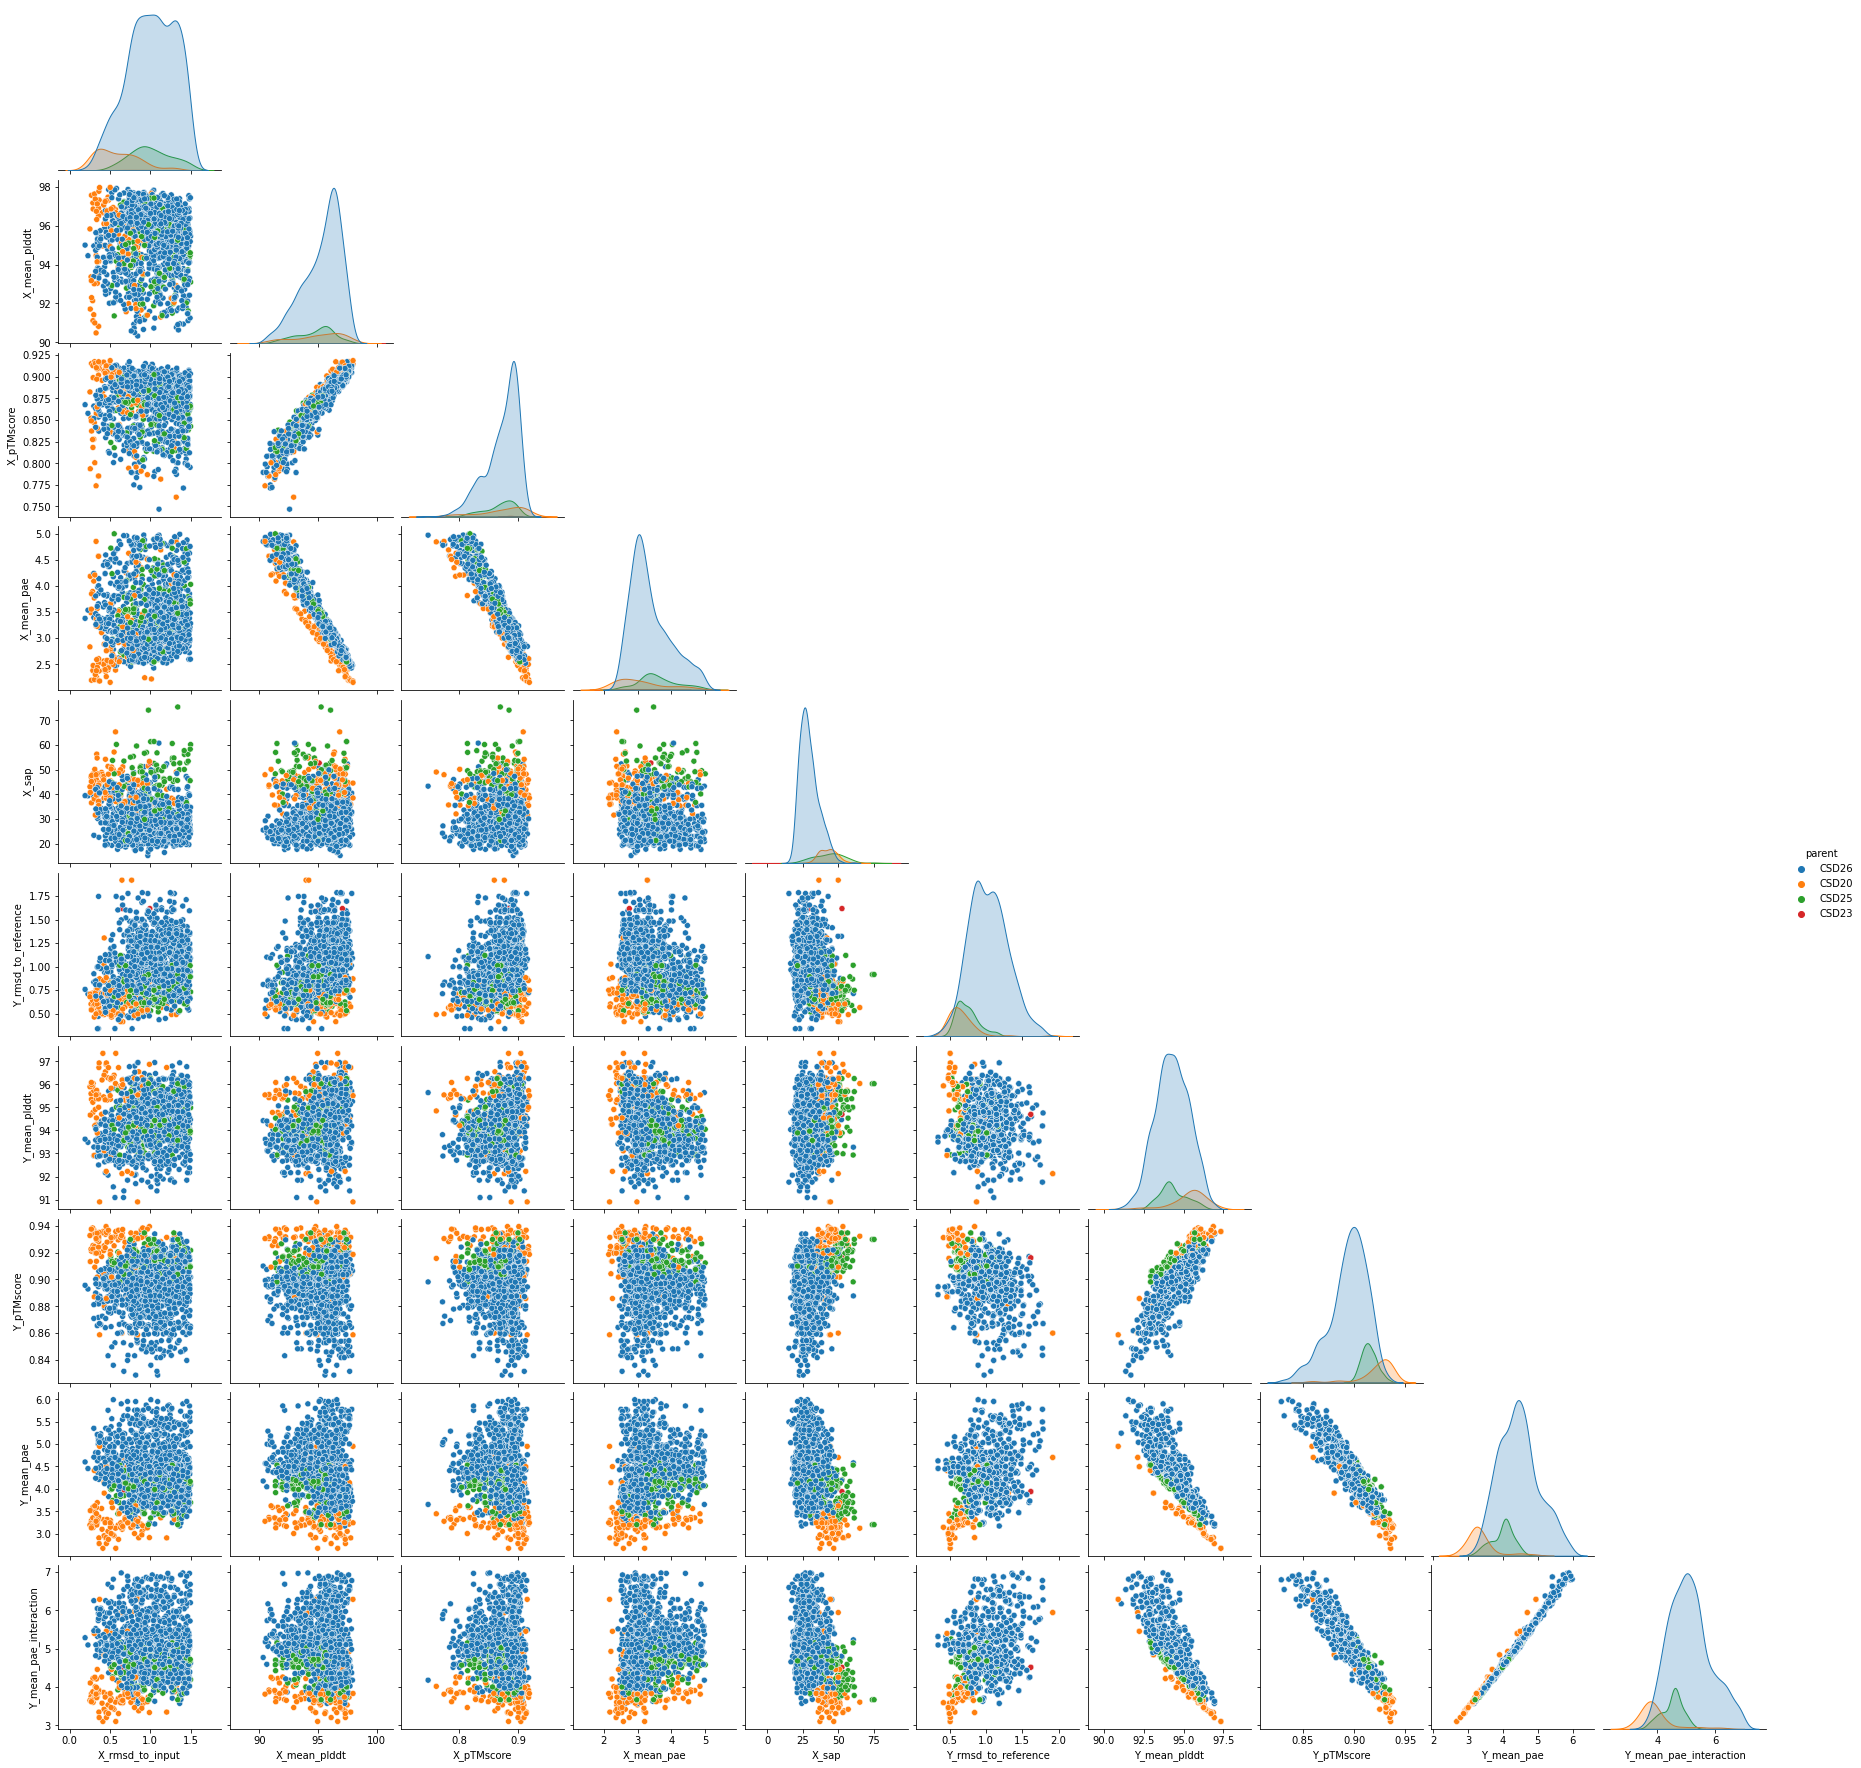

In [10]:
import sys
sys.path.insert(0, "/home/broerman/crispy_shifty")
from crispy_shifty.utils.plotting import pairplot_df

cols = [
    "X_rmsd_to_input",
    "X_mean_plddt",
    "X_pTMscore",
    "X_mean_pae",
    "X_sap",
    "Y_rmsd_to_reference",
    "Y_mean_plddt",
    "Y_pTMscore",
    "Y_mean_pae",
    "Y_mean_pae_interaction",
]

the_fig = pairplot_df(
    df=complete_df,
    cols=cols,
    hue="parent"
)

13it [00:02,  5.91it/s]


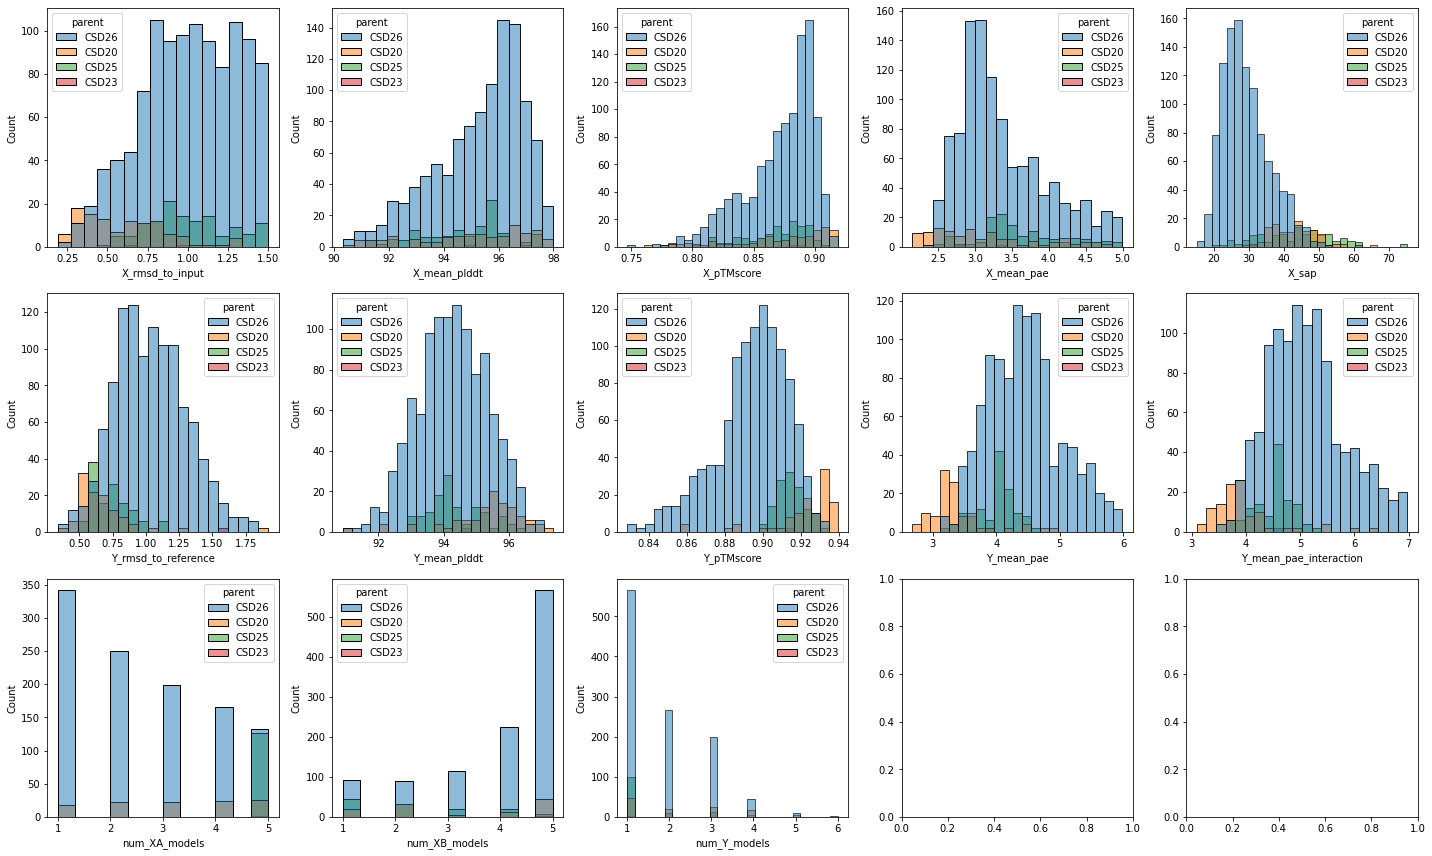

In [11]:
from crispy_shifty.utils.plotting import histplot_df

cols = [
    "X_rmsd_to_input",
    "X_mean_plddt",
    "X_pTMscore",
    "X_mean_pae",
    "X_sap",
    "Y_rmsd_to_reference",
    "Y_mean_plddt",
    "Y_pTMscore",
    "Y_mean_pae",
    "Y_mean_pae_interaction",
    "num_XA_models",
    "num_XB_models",
    "num_Y_models"
]

the_fig = histplot_df(
    df=complete_df,
    cols=cols,
    hue="parent"
)
the_fig[0].savefig(os.path.join(output_path, "af2_designs_refiltered.png"))

13it [00:02,  4.46it/s]


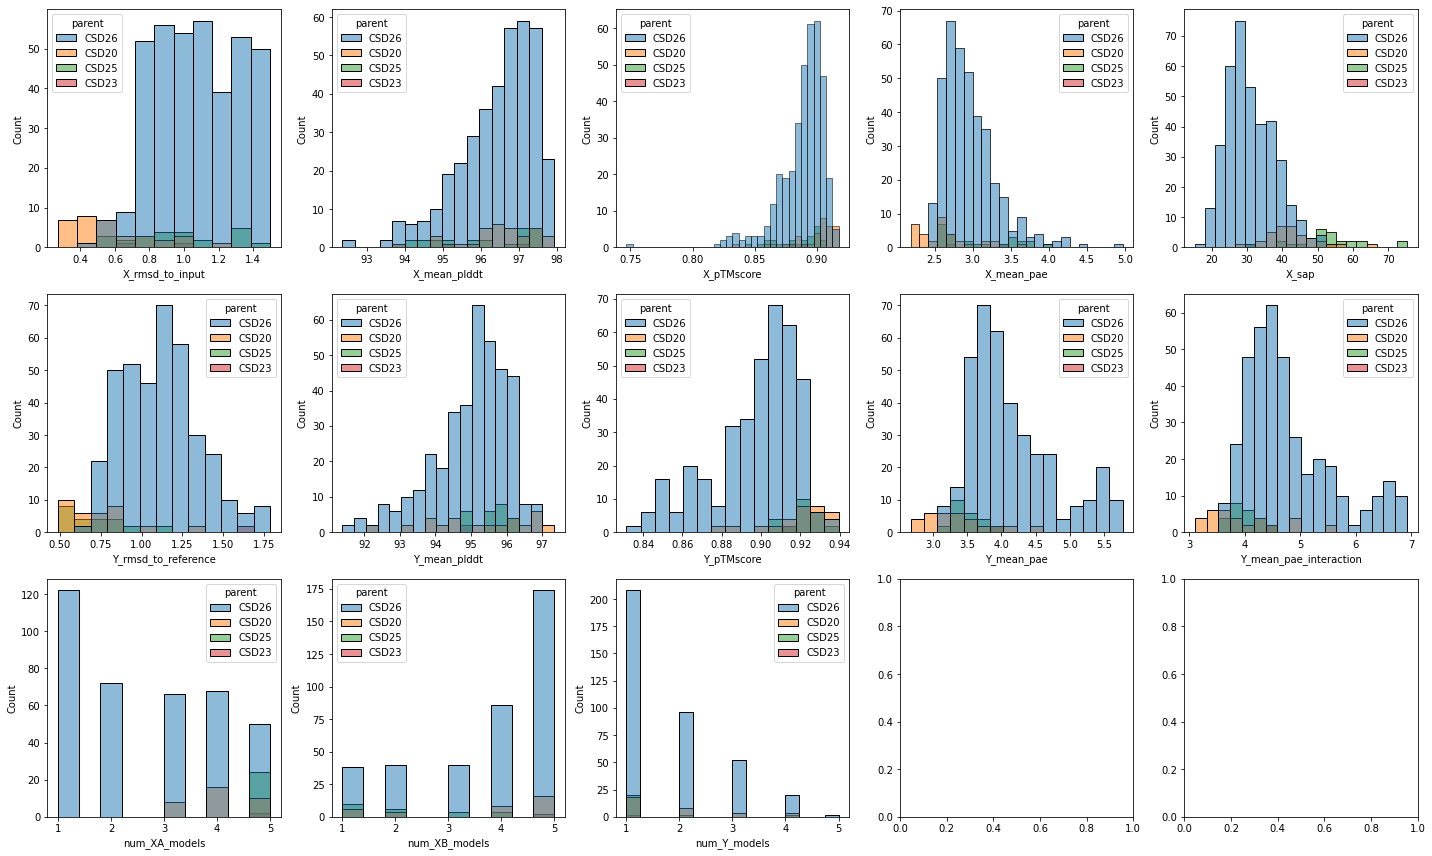

In [12]:
the_fig = histplot_df(
    df=complete_df.query("mpnn_msd_design_area == 'full'"),
    cols=cols,
    hue="parent"
)

13it [00:01,  7.12it/s]


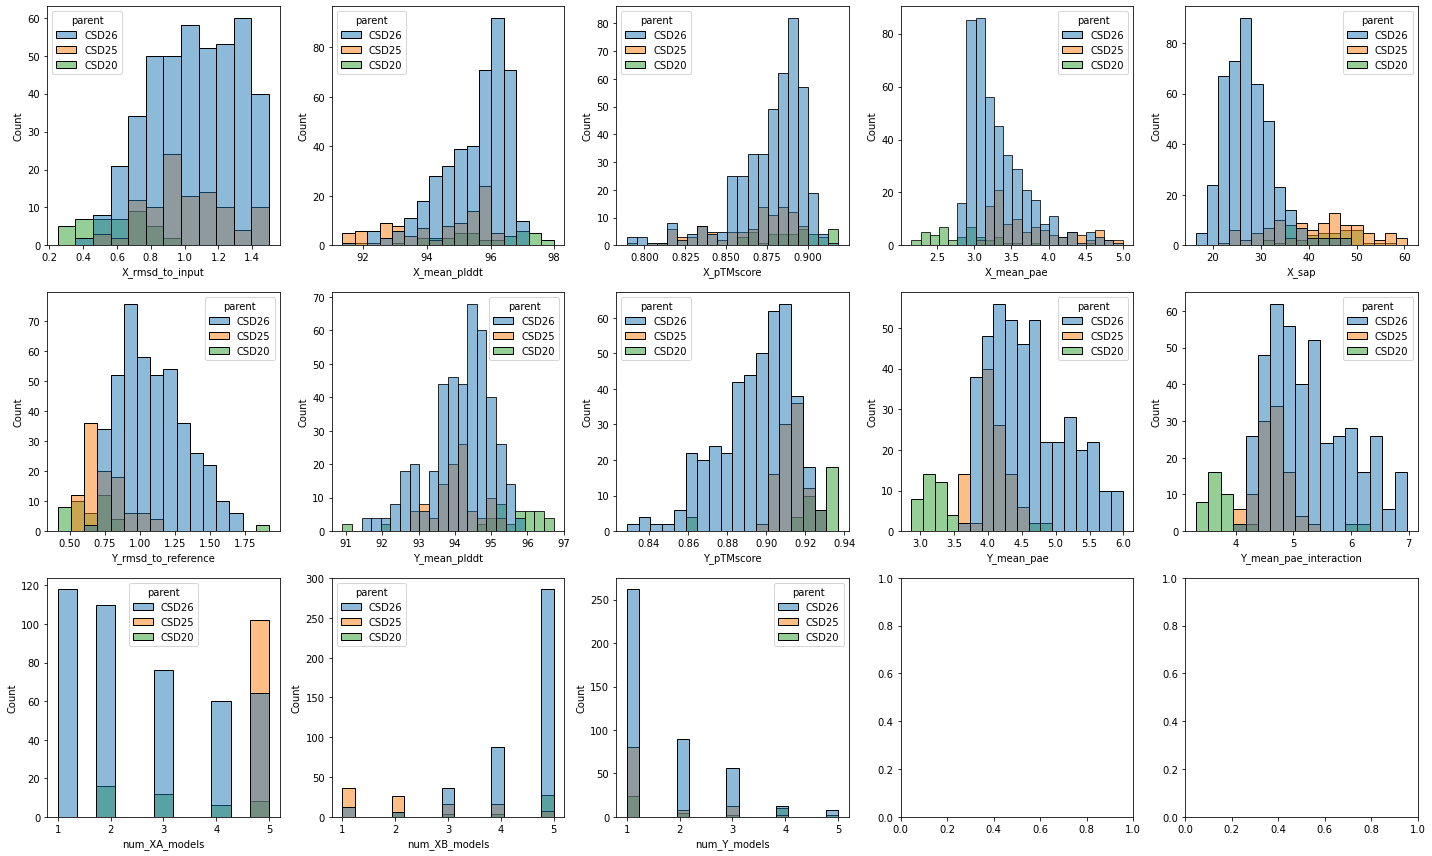

In [13]:
the_fig = histplot_df(
    df=complete_df.query("mpnn_msd_design_area == 'neighborhood'"),
    cols=cols,
    hue="parent"
)

In [15]:
def filter_df_match(df, query):

    filtered_df = df.query(query)

    unique_combos = set()
    for index, row in filtered_df.iterrows():
        unique_combos.add(row['unique_combo'])

    combos_to_keep = set()
    for unique_combo in unique_combos:
        if filtered_df[filtered_df['unique_combo'] == unique_combo]['X_protomer'].nunique() == 2:
            combos_to_keep.add(unique_combo)

    matched_df_list = []
    for combo in combos_to_keep:
        matched_df_list.append(filtered_df[filtered_df["unique_combo"] == combo])
    matched_df = pd.concat(matched_df_list, axis=0)

    return matched_df

filtered_20_df = filter_df_match(complete_df, "X_sap < 40 and parent == 'CSD20'")
print(filtered_20_df.X_protomer.value_counts())
filtered_20_df

A    7
B    7
Name: X_protomer, dtype: int64


,X_mean_pae,X_mean_pae_interaction,X_mean_pae_intra_chain,X_mean_pae_intra_chain_A,X_mean_plddt,X_model,X_pTMscore,X_protomer,X_recycles,X_rmsd_to_input,...,mpnn_msd_design_area,mpnn_msd_temperature,parent,combo,mpnn_seq_id,unique_combo,num_Y_models,num_XA_models,num_XB_models,X_sap
/pscratch/sd/b/broerman/04_fold_dimer_X/decoys/0005/04_fold_dimer_X_450f2795daf8481b827aafb7de096a01.pdb.bz2,2.783928,NaN,2.678524,2.678524,95.807289,3,0.890773,A,3.0,0.504723,...,full,0.2,CSD20,3511,mpnn_seq_0001,CSD20_3511_full_mpnn_seq_0001,2.0,3.0,5.0,39.164875
/pscratch/sd/b/broerman/04_fold_dimer_X/decoys/0005/04_fold_dimer_X_9978c7537b2b469cb66906f8b7b9332a.pdb.bz2,2.192163,NaN,2.142208,2.142208,97.574287,5,0.915154,B,3.0,0.270449,...,full,0.2,CSD20,3511,mpnn_seq_0001,CSD20_3511_full_mpnn_seq_0001,2.0,3.0,5.0,36.517712
/pscratch/sd/b/broerman/04_fold_dimer_X/decoys/0005/04_fold_dimer_X_bfcf827db4984e64b0f0263a78a17daa.pdb.bz2,2.631068,NaN,2.583133,2.583133,96.140953,5,0.883115,A,3.0,0.716623,...,full,0.2,CSD20,3511,mpnn_seq_0002,CSD20_3511_full_mpnn_seq_0002,1.0,3.0,5.0,36.783691
/pscratch/sd/b/broerman/04_fold_dimer_X/decoys/0005/04_fold_dimer_X_90534a9631d24bffb1a428937a83843e.pdb.bz2,2.260813,NaN,2.200995,2.200995,97.305664,5,0.912456,B,3.0,0.453522,...,full,0.2,CSD20,3511,mpnn_seq_0002,CSD20_3511_full_mpnn_seq_0002,1.0,3.0,5.0,39.731342
/pscratch/sd/b/broerman/04_fold_dimer_X/decoys/0008/04_fold_dimer_X_332f8ba5c80343ee9cd9dfdcb92880ad.pdb.bz2,3.408735,NaN,3.291703,3.291703,94.273209,5,0.858297,A,3.0,0.718631,...,neighborhood,0.2,CSD20,1111,mpnn_seq_0004,CSD20_1111_neighborhood_mpnn_seq_0004,1.0,2.0,5.0,34.427956
/pscratch/sd/b/broerman/04_fold_dimer_X/decoys/0008/04_fold_dimer_X_d6aa3207791f4c29812e70461d502d96.pdb.bz2,2.151193,NaN,2.115117,2.115117,97.978264,5,0.918522,B,3.0,0.502131,...,neighborhood,0.2,CSD20,1111,mpnn_seq_0004,CSD20_1111_neighborhood_mpnn_seq_0004,1.0,2.0,5.0,38.490749
/pscratch/sd/b/broerman/04_fold_dimer_X/decoys/0000/04_fold_dimer_X_f07030a93ce141e58d9a5b2111eb7151.pdb.bz2,3.339040,NaN,3.213121,3.213121,93.932152,4,0.868173,A,3.0,0.765653,...,neighborhood,0.2,CSD20,1511,mpnn_seq_0001,CSD20_1511_neighborhood_mpnn_seq_0001,1.0,2.0,5.0,39.898014
/pscratch/sd/b/broerman/04_fold_dimer_X/decoys/0000/04_fold_dimer_X_783a87153bbc49569ff1e14e1ac1ad15.pdb.bz2,2.301869,NaN,2.233875,2.233875,97.379692,5,0.915362,B,3.0,0.317802,...,neighborhood,0.2,CSD20,1511,mpnn_seq_0001,CSD20_1511_neighborhood_mpnn_seq_0001,1.0,2.0,5.0,31.583059
/pscratch/sd/b/broerman/04_fold_dimer_X/decoys/0004/04_fold_dimer_X_b53413c4e92a49b2ab90003d55ffd733.pdb.bz2,4.250927,NaN,4.132349,4.132349,91.564827,4,0.815199,A,3.0,0.700146,...,interface,0.2,CSD20,1511,mpnn_seq_0004,CSD20_1511_interface_mpnn_seq_0004,1.0,1.0,1.0,35.335056
/pscratch/sd/b/broerman/04_fold_dimer_X/decoys/0004/04_fold_dimer_X_09f4e4f187f9426ba9421a6990ae0b54.pdb.bz2,4.225748,NaN,4.129939,4.129939,91.106728,5,0.818204,B,3.0,0.289054,...,interface,0.2,CSD20,1511,mpnn_seq_0004,CSD20_1511_interface_mpnn_seq_0004,1.0,1.0,1.0,39.704639


In [18]:
filtered_23_df = filter_df_match(complete_df, "parent == 'CSD23'")
print(filtered_23_df.X_protomer.value_counts())
filtered_23_df

A    1
B    1
Name: X_protomer, dtype: int64


,X_mean_pae,X_mean_pae_interaction,X_mean_pae_intra_chain,X_mean_pae_intra_chain_A,X_mean_plddt,X_model,X_pTMscore,X_protomer,X_recycles,X_rmsd_to_input,...,mpnn_msd_design_area,mpnn_msd_temperature,parent,combo,mpnn_seq_id,unique_combo,num_Y_models,num_XA_models,num_XB_models,X_sap
/pscratch/sd/b/broerman/04_fold_dimer_X/decoys/0007/04_fold_dimer_X_a9a85bacf2b14c40a0fa558f88dae809.pdb.bz2,2.758693,NaN,2.695444,2.695444,97.073982,5,0.890603,A,3.0,0.651867,...,full,0.2,CSD23,4211,mpnn_seq_0006,CSD23_4211_full_mpnn_seq_0006,1.0,5.0,5.0,30.349747
/pscratch/sd/b/broerman/04_fold_dimer_X/decoys/0007/04_fold_dimer_X_3d5bb43459ea48c883773ef2f790d7ba.pdb.bz2,3.395579,NaN,3.302929,3.302929,95.094765,3,0.881471,B,3.0,0.993767,...,full,0.2,CSD23,4211,mpnn_seq_0006,CSD23_4211_full_mpnn_seq_0006,1.0,5.0,5.0,52.655571


In [16]:
filtered_25_df = filter_df_match(complete_df, "X_sap < 40 and parent == 'CSD25'")
print(filtered_25_df.X_protomer.value_counts())
filtered_25_df

A    7
B    7
Name: X_protomer, dtype: int64


,X_mean_pae,X_mean_pae_interaction,X_mean_pae_intra_chain,X_mean_pae_intra_chain_A,X_mean_plddt,X_model,X_pTMscore,X_protomer,X_recycles,X_rmsd_to_input,...,mpnn_msd_design_area,mpnn_msd_temperature,parent,combo,mpnn_seq_id,unique_combo,num_Y_models,num_XA_models,num_XB_models,X_sap
/pscratch/sd/b/broerman/04_fold_dimer_X/decoys/0003/04_fold_dimer_X_5ff21bdd9b40403496578d480388ae40.pdb.bz2,3.181535,NaN,3.057424,3.057424,95.914108,5,0.881484,A,3.0,0.965959,...,neighborhood,0.2,CSD25,1211,mpnn_seq_0002,CSD25_1211_neighborhood_mpnn_seq_0002,1.0,5.0,1.0,29.851301
/pscratch/sd/b/broerman/04_fold_dimer_X/decoys/0003/04_fold_dimer_X_b9d6e9c095e1405e8aae06cafde74ea7.pdb.bz2,4.710594,NaN,4.598089,4.598089,92.020485,5,0.816920,B,3.0,1.445788,...,neighborhood,0.2,CSD25,1211,mpnn_seq_0002,CSD25_1211_neighborhood_mpnn_seq_0002,1.0,5.0,1.0,36.709793
/pscratch/sd/b/broerman/04_fold_dimer_X/decoys/0010/04_fold_dimer_X_e8dcf681f411436cb62badd99e8525e5.pdb.bz2,3.162464,NaN,3.042768,3.042768,96.041534,3,0.891805,A,3.0,1.117435,...,neighborhood,0.2,CSD25,1311,mpnn_seq_0007,CSD25_1311_neighborhood_mpnn_seq_0007,1.0,5.0,4.0,34.289040
/pscratch/sd/b/broerman/04_fold_dimer_X/decoys/0010/04_fold_dimer_X_b177ee91c9184b1599fa8cf730266a87.pdb.bz2,3.558553,NaN,3.442708,3.442708,94.835052,3,0.872475,B,3.0,0.792862,...,neighborhood,0.2,CSD25,1311,mpnn_seq_0007,CSD25_1311_neighborhood_mpnn_seq_0007,1.0,5.0,4.0,34.159687
/pscratch/sd/b/broerman/04_fold_dimer_X/decoys/0010/04_fold_dimer_X_ea2080a7814a43709aa21fe6f49d0144.pdb.bz2,3.155980,NaN,3.039212,3.039212,95.960632,3,0.892212,A,3.0,1.251695,...,neighborhood,0.2,CSD25,1311,mpnn_seq_0005,CSD25_1311_neighborhood_mpnn_seq_0005,1.0,5.0,4.0,30.826864
/pscratch/sd/b/broerman/04_fold_dimer_X/decoys/0010/04_fold_dimer_X_c4a269f59f304807aecc1a0175e4a320.pdb.bz2,3.572968,NaN,3.458752,3.458752,94.724602,3,0.871521,B,3.0,0.802502,...,neighborhood,0.2,CSD25,1311,mpnn_seq_0005,CSD25_1311_neighborhood_mpnn_seq_0005,1.0,5.0,4.0,37.671272
/pscratch/sd/b/broerman/04_fold_dimer_X/decoys/0010/04_fold_dimer_X_c667837bf5774d83a4f1a937d77b8c25.pdb.bz2,3.210612,NaN,3.094160,3.094160,95.814011,3,0.887873,A,3.0,1.089378,...,neighborhood,0.2,CSD25,1311,mpnn_seq_0003,CSD25_1311_neighborhood_mpnn_seq_0003,1.0,5.0,4.0,31.829973
/pscratch/sd/b/broerman/04_fold_dimer_X/decoys/0010/04_fold_dimer_X_503ea51842f0444e83f1eecad4ad70c6.pdb.bz2,3.613771,NaN,3.499312,3.499312,94.619125,3,0.869916,B,3.0,0.814844,...,neighborhood,0.2,CSD25,1311,mpnn_seq_0003,CSD25_1311_neighborhood_mpnn_seq_0003,1.0,5.0,4.0,38.303696
/pscratch/sd/b/broerman/04_fold_dimer_X/decoys/0010/04_fold_dimer_X_2e5e18e0417041239584e70c52d3cabd.pdb.bz2,3.169662,NaN,3.051739,3.051739,95.916595,3,0.887260,A,3.0,1.098357,...,neighborhood,0.2,CSD25,1311,mpnn_seq_0008,CSD25_1311_neighborhood_mpnn_seq_0008,1.0,5.0,4.0,30.383417
/pscratch/sd/b/broerman/04_fold_dimer_X/decoys/0010/04_fold_dimer_X_a909a85bdcf3410f86a1fd83f5340fda.pdb.bz2,3.657708,NaN,3.544782,3.544782,94.499794,3,0.867249,B,3.0,0.846488,...,neighborhood,0.2,CSD25,1311,mpnn_seq_0008,CSD25_1311_neighborhood_mpnn_seq_0008,1.0,5.0,4.0,37.987762


In [17]:
filtered_26_df = filter_df_match(complete_df, "X_sap < 24 and parent == 'CSD26' and num_XA_models >= 3 and num_XB_models >= 3")
print(filtered_26_df.X_protomer.value_counts())
filtered_26_df

A    9
B    9
Name: X_protomer, dtype: int64


,X_mean_pae,X_mean_pae_interaction,X_mean_pae_intra_chain,X_mean_pae_intra_chain_A,X_mean_plddt,X_model,X_pTMscore,X_protomer,X_recycles,X_rmsd_to_input,...,mpnn_msd_design_area,mpnn_msd_temperature,parent,combo,mpnn_seq_id,unique_combo,num_Y_models,num_XA_models,num_XB_models,X_sap
/pscratch/sd/b/broerman/04_fold_dimer_X/decoys/0008/04_fold_dimer_X_a81518ed6e804d53bc8896decb6068dd.pdb.bz2,3.508393,NaN,3.406838,3.406838,95.027580,5,0.860946,A,3.0,1.275038,...,neighborhood,0.2,CSD26,2232,mpnn_seq_0001,CSD26_2232_neighborhood_mpnn_seq_0001,1.0,3.0,5.0,22.399343
/pscratch/sd/b/broerman/04_fold_dimer_X/decoys/0008/04_fold_dimer_X_dca1c08ef7044d27a91a62599fc5847c.pdb.bz2,3.169616,NaN,3.070308,3.070308,96.231201,3,0.897833,B,3.0,0.977341,...,neighborhood,0.2,CSD26,2232,mpnn_seq_0001,CSD26_2232_neighborhood_mpnn_seq_0001,1.0,3.0,5.0,20.260889
/pscratch/sd/b/broerman/04_fold_dimer_X/decoys/0010/04_fold_dimer_X_0e0d626925684f2fbc6b250001d925dc.pdb.bz2,3.059479,NaN,2.956392,2.956392,96.410965,5,0.892698,A,3.0,1.110317,...,neighborhood,0.2,CSD26,4231,mpnn_seq_0007,CSD26_4231_neighborhood_mpnn_seq_0007,1.0,4.0,5.0,22.348381
/pscratch/sd/b/broerman/04_fold_dimer_X/decoys/0010/04_fold_dimer_X_7f4b24d09b704846adf0215bcbe28f79.pdb.bz2,3.009377,NaN,2.919292,2.919292,96.430016,1,0.898373,B,3.0,0.646592,...,neighborhood,0.2,CSD26,4231,mpnn_seq_0007,CSD26_4231_neighborhood_mpnn_seq_0007,1.0,4.0,5.0,21.584692
/pscratch/sd/b/broerman/04_fold_dimer_X/decoys/0012/04_fold_dimer_X_05c01ea47d524df6ade6b1e2d04b0d0b.pdb.bz2,3.246735,NaN,3.138214,3.138214,95.981956,3,0.892419,A,3.0,1.240003,...,neighborhood,0.2,CSD26,5221,mpnn_seq_0001,CSD26_5221_neighborhood_mpnn_seq_0001,1.0,4.0,5.0,23.120131
/pscratch/sd/b/broerman/04_fold_dimer_X/decoys/0012/04_fold_dimer_X_1f3025c5a4ae4df58b6240c6f5492e7f.pdb.bz2,3.040789,NaN,2.938305,2.938305,96.013588,5,0.886117,B,3.0,0.844944,...,neighborhood,0.2,CSD26,5221,mpnn_seq_0001,CSD26_5221_neighborhood_mpnn_seq_0001,1.0,4.0,5.0,21.571951
/pscratch/sd/b/broerman/04_fold_dimer_X/decoys/0003/04_fold_dimer_X_a0a1ac43790a46519d5c538d699e9519.pdb.bz2,2.963818,NaN,2.858562,2.858562,96.368874,5,0.896570,A,3.0,1.348744,...,neighborhood,0.2,CSD26,3321,mpnn_seq_0002,CSD26_3321_neighborhood_mpnn_seq_0002,2.0,5.0,5.0,19.970592
/pscratch/sd/b/broerman/04_fold_dimer_X/decoys/0003/04_fold_dimer_X_47542b0a35474fe39c653f14e06d4f37.pdb.bz2,2.903175,NaN,2.801074,2.801074,96.771988,1,0.901999,B,3.0,1.188773,...,neighborhood,0.2,CSD26,3321,mpnn_seq_0002,CSD26_3321_neighborhood_mpnn_seq_0002,2.0,5.0,5.0,23.011389
/pscratch/sd/b/broerman/04_fold_dimer_X/decoys/0006/04_fold_dimer_X_f8b8d7f2065f468d8501161553621114.pdb.bz2,3.194273,NaN,3.085303,3.085303,96.173134,3,0.897110,A,3.0,1.177644,...,neighborhood,0.2,CSD26,4332,mpnn_seq_0005,CSD26_4332_neighborhood_mpnn_seq_0005,1.0,4.0,5.0,21.807507
/pscratch/sd/b/broerman/04_fold_dimer_X/decoys/0006/04_fold_dimer_X_a3fe409fce484ee8865c66c9e34ab88b.pdb.bz2,3.049112,NaN,2.947982,2.947982,96.273956,1,0.893827,B,3.0,0.933469,...,neighborhood,0.2,CSD26,4332,mpnn_seq_0005,CSD26_4332_neighborhood_mpnn_seq_0005,1.0,4.0,5.0,22.282263


In [29]:
import os, shutil
import pyrosetta.distributed.cluster as cluster

def copy_designs(df, out_path):
    for index, row in df.iterrows():
        digs_fname_X = index[24:]
        shutil.copy(digs_fname_X, out_path + row['unique_combo'] + '_' + row['X_protomer'] + '.pdb.bz2')
        if row['X_protomer'] == 'A':
            digs_fname_Y = cluster.get_scores_dict(digs_fname_X)["instance"]["tasks"]["pdb_path"].split('____')[0][24:]
            shutil.copy(digs_fname_Y, out_path + row['unique_combo'] + '_AB.pdb.bz2')

In [30]:
copy_designs(filtered_20_df, '05_selected/filtering_2_sap/manual_filter_designs/')
copy_designs(filtered_25_df, '05_selected/filtering_2_sap/manual_filter_designs/')
copy_designs(filtered_26_df, '05_selected/filtering_2_sap/manual_filter_designs/')

Hmm, still not very many good designs for CSD 20 and 25. None for 23. I think I need to go back and filter less stringently on AF2 metrics so I find more designs with low SAP.